<a href="https://colab.research.google.com/github/Developer3009/Brain-Tumor-Classification-using-CNN/blob/main/Brain_Tumor_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 71% 106M/149M [00:00<00:00, 1.11GB/s]
100% 149M/149M [00:00<00:00, 978MB/s] 


In [7]:
!unzip brain-tumor-mri-dataset.zip -d brain_tumor_dataset


Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: brain_tumor_

In [8]:
import os
os.listdir("brain_tumor_dataset")


['Testing', 'Training']

In [9]:
['Training', 'Testing']


['Training', 'Testing']

In [10]:
os.listdir("brain_tumor_dataset/Training")


['glioma', 'pituitary', 'meningioma', 'notumor']

In [11]:
train_dir = "/content/brain_tumor_dataset/Training"
test_dir  = "/content/brain_tumor_dataset/Testing"


img_size = (224, 224)
batch_size = 32

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')   # 4 tumor classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    train_data,
    epochs=1)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.5322 - loss: 1.1566


In [18]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)


41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 869ms/step - accuracy: 0.6796 - loss: 0.6785
Test Accuracy: 0.7696415185928345


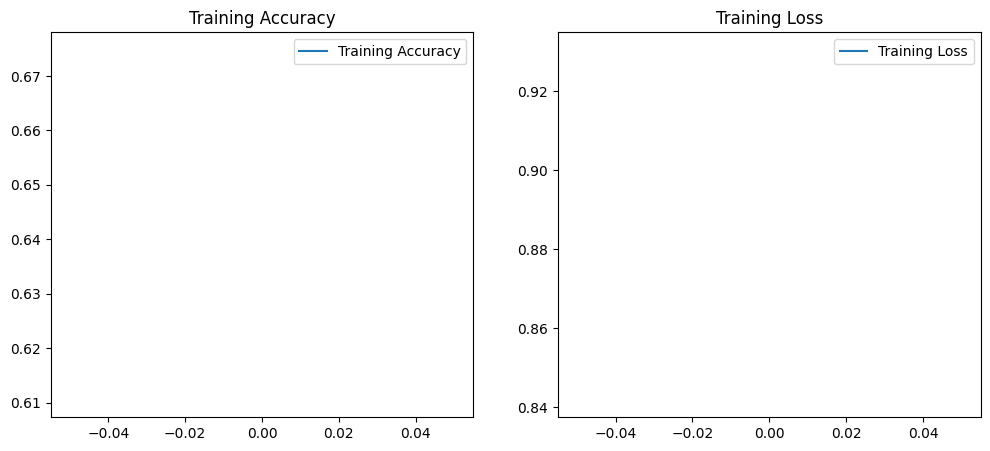

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title("Training Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Training Loss")
plt.legend()

plt.show()


In [20]:
print(train_data.class_indices)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
